In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_data(filename):
    df = pd.read_parquet(filename)
    # Preprocessing data
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60
    # Drop outliers (<= X >= )
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
    # Generate unique pickup and drop off combo column
    # Convert locations to strings
    to_stringify = ['PULocationID', 'DOLocationID']
    df[to_stringify] = df[to_stringify].astype(str)
    df['PO_DO'] = (df['PULocationID'] + '_' + df['DOLocationID'])
    df = df[["PO_DO", "duration"]]
    return df

In [4]:
df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df.head(3)

,PO_DO,duration
0,161_141,8.433333
1,43_237,6.316667
2,48_238,12.750000


In [5]:
# Assign target values
target = 'duration'
y = df[target].values
X = df[['PO_DO']]

In [6]:
train_dicts = X.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 21801)


In [7]:
y.shape

(3009173,)

In [8]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y)

LinearRegression()

In [9]:
y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y, y_pred, squared=False)}')

Train RMSE: 5.02673907370026


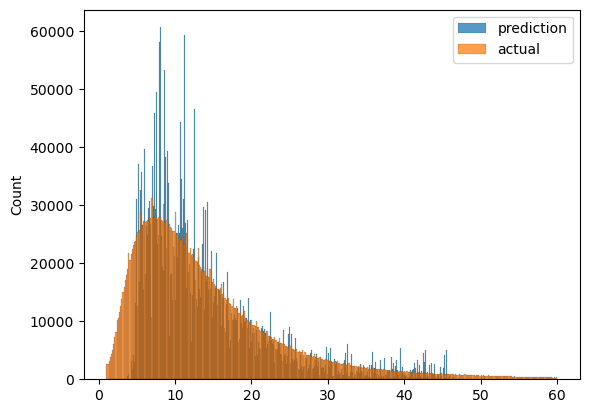

In [10]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y, label='actual')

plt.legend();

In [11]:
del df

In [12]:
df_val = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_val.head(3)

,PO_DO,duration
0,142_163,1.683333
3,132_26,32.083333
4,161_145,13.300000


In [14]:
val_dicts = df_val[['PO_DO']].to_dict(orient='records')

In [15]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

In [16]:
y_val_pred = lr.predict(X_val)

In [17]:
print(f'Val RMSE: {mean_squared_error(y_val, y_val_pred, squared=False)}')

Val RMSE: 5.198559911422032


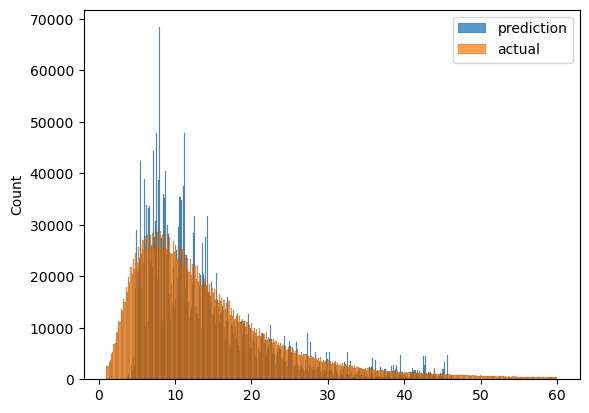

In [18]:
sns.histplot(y_val_pred, label='prediction')
sns.histplot(y_val, label='actual')

plt.legend();